<a href="https://colab.research.google.com/github/vinothrajkumar05/Linera-Regression/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [ ]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


No skew in the data. 

In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Median and mean are closer to each other - there is less skew in the data

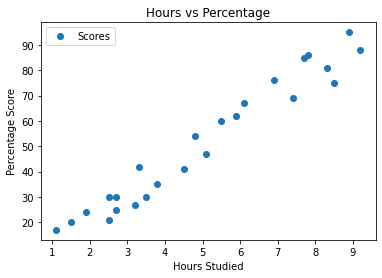

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.



In [ ]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Preparing the data

In [ ]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [ ]:
#dataset.iloc[row_criteria,column_criteria]

In [ ]:
X = dataset.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = dataset.iloc[:, 1].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
y_test

array([69, 67, 27, 85, 54])

In [ ]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

# Normlising/Scaling the data

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
X_test

array([[-0.06463656],
       [ 1.35736779],
       [ 1.57282299],
       [-0.92645738],
       [ 1.96064236]])

# Modelling

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

3.0980408893375326


In [ ]:
print(regressor.coef_) # the final learnt model is predictedScore = 9.91 * hoursStudied + 2.01


# predicted score  = 9.6 * (hours) + 3.09

[9.60498629]


In [ ]:
regressor.predict([[5]])

array([51.12297233])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,67,63.036574
1,88,94.519060
2,69,76.238906
3,30,28.507396
4,81,85.378983


In [ ]:
regressor.predict([[6]]) # perils of extrapolation

array([60.72795861])

In [ ]:
x = input()
x

# Metrics

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9000546706590143


# Custom Loss Function

In [ ]:
X

In [ ]:
beta_init -> parameter
X -> fts
y -> target
ypred ->  matmul of beta_init and X = np.matmul(X,beta)
loss -> mean(abs(y - y_pred)) = np.mean(np.abs(y - np.matmul(X,beta)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

# we will write our own loss function
# my model is ypred = m^2 * x + c^2
# my loss function is MSE loss funcition =>
# my loss function is np.mean((Y - np.matmul(X,np.square(beta))))
#beta stores the values of the parameters : beta[0]  will be m and beta[1] will be c
# ypred = (np.square(beta[0]) * X) + (np.square(beta[1]) * 1)
#mse = np.mean(np.square(ypred - y))

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.square(((np.square(beta[0]) * X) + (np.square(beta[1]) * 1)) - Y)) 
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([2,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

In [ ]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

# **Effect of Outlier**

In [ ]:
X_train_outlier = np.vstack([X_train,scaler.transform([[24]])])
y_train_outlier = np.append(y_train,100)

plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression()
regressor.fit(X_train_outlier, y_train_outlier)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)
print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

In [ ]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize

# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.abs(np.matmul(X,beta) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([6,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train_outlier,y_train_outlier),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 10.6 * hoursStudies
print(beta_hat)

# **Multiple Linear Regression**

In [ ]:
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()
#dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
dataset['Petrol_tax'].unique()

array([ 9.  ,  7.5 ,  8.  , 10.  ,  7.  ,  8.5 ,  6.58,  5.  ,  6.  ])

In [ ]:
dataset.shape

(48, 5)

# **EDA**

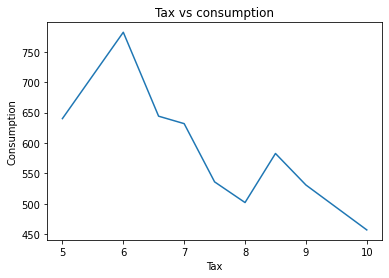

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) There is a linear relationship between tax and consumption
2) As tax increases, comsumption decreases which is in-line with our GK
3) No transformation required


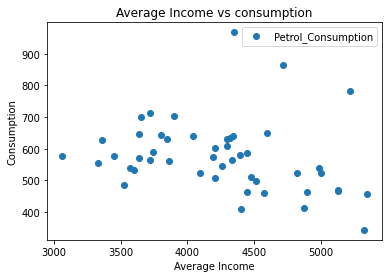

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 
2) No transformation reqd
3) The direction of relatiohsnip is not in-line with our GK

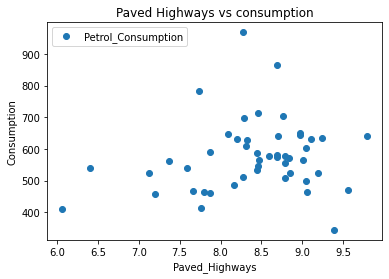

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [ ]:
dataset['transformed'] = np.log(dataset['Paved_Highways'])
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

1) There is low correlation bettwen log transformed feature and the target - can be considered for Linear regression

In [ ]:
dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

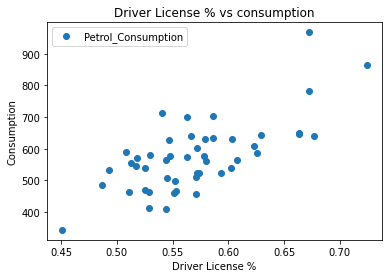

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:

dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 
2) No transformation reqd

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'logPaved_Highways',
       'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -36 *scaled_petrol_tax + -37 * scaled_avg_income + (-11 * scaled(log(paved_highways))) + 78 * scaled_pop_driver + 583

,Coefficient
Petrol_tax,-36.434197
Average_income,-37.774550
LogPaved_Highways,-11.819271
Population_Driver_licence(%),78.286363


In [ ]:
regressor.intercept_ # c 

583.9736842105262

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.1385785897115539


# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

# Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

In [ ]:
list(zip([1,2,3],['a','b','c']))

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()


# **Ridge Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

